<a href="https://colab.research.google.com/github/HarrisonJYU/nycparks_failedtrees/blob/main/notebook/HY_NYC_Parks_Task_3_Failed_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

pd.set_option("max_rows", None)

In [ ]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>


In [ ]:
df_failedtrees=pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_20210621.csv')
df_riskassessments=pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_RiskAssessments_20210621.csv')
df_workhistory=pd.read_csv('/content/drive/My Drive/nyc-parks-data/data/FailedTrees_WorkHistory_20210621.csv',encoding = 'unicode_escape')

In [ ]:
df_riskassessments.shape

(2714, 12)

### Risk Assessment First Glance

In [ ]:
df_riskassessments.head(1)

,Tree_GlobalID,INSPID,INSP_GlobalID,Risk_GlobalID,Risk_Defect,Risk_DefectLocation,Risk_Failure,Risk_ImpactTarget,Risk_FailureImpact,Risk_FailureConsequence,RiskRating,MitigationRecommendation,RiskRating_Grouped
0,3C5B726A-232A-4455-A79D-1F93BBFA104A,6516251,47F10AD4-28C0-4FD7-A3E8-A7F75A10575D,CB8C9B85-C6DF-496E-BCFE-6194DF812F71,Weak Branch Unions,Branches,Improbable (1),Very Low (1),Unlikely (2),Negligible (1),Low (3),NaN,Low


In [ ]:
df_riskassessments[df_riskassessments.Tree_GlobalID.duplicated()].sort_values(by='Tree_GlobalID').head(2)

,Tree_GlobalID,INSPID,INSP_GlobalID,Risk_GlobalID,Risk_Defect,Risk_DefectLocation,Risk_Failure,Risk_ImpactTarget,Risk_FailureImpact,Risk_FailureConsequence,RiskRating,MitigationRecommendation,RiskRating_Grouped
1258,004653A8-5C5B-4E4C-AE0B-AB360DA162CE,8795908,0C580696-D8A8-4C49-9A5A-A19BE857241F,559383B7-5EB8-4BCA-AF03-E1341CF8A07D,Poor Tree Architecture,Branches,Probable (3),Medium (3),Somewhat Likely (6),Significant (3),Moderate (9),REMOVE L/D,Moderate
1932,004653A8-5C5B-4E4C-AE0B-AB360DA162CE,6365745,B69F0172-649B-471A-B1FC-87E15633A071,ADC12848-A9A4-4CB1-BC0E-583CB7E50827,Dead Wood,Branches,Possible (2),Very Low (1),Unlikely (3),Negligible (1),Low (4),NaN,Low


In [ ]:
df_workhistory.Tree_GlobalID.nunique()

3827

In [ ]:
def group_ratings(x):
  y = ''
  if 'Low' in x:
    y = 'Low'
  elif 'Moderate' in x:
    y = 'Moderate'
  elif 'High' in x:
    y = 'High'
  elif 'Extreme' in x:
    y = 'Extreme'
  else:
    y = 'Unknown'
  return y

df_riskassessments['RiskRating_Grouped'] = df_riskassessments.RiskRating.apply(lambda x: group_ratings(str(x)))

In [ ]:
df_riskassessments.RiskRating_Grouped.value_counts()

Low         2185
Moderate     352
High         161
Extreme       14
Unknown        2
Name: RiskRating_Grouped, dtype: int64

In [ ]:
# df_riskassessments.Risk_Defect.value_counts()

In [ ]:
df_riskassessments.Risk_DefectLocation.value_counts()

Branches        1570
Stem             586
Entire Tree      257
Roots            148
Root Flare       132
Branch Union      21
Name: Risk_DefectLocation, dtype: int64

In [ ]:
df_riskassessments.groupby(['RiskRating_Grouped','Risk_DefectLocation'])['Tree_GlobalID'].count()

RiskRating_Grouped  Risk_DefectLocation
Extreme             Branch Union              1
                    Branches                  6
                    Root Flare                1
                    Roots                     4
                    Stem                      2
High                Branch Union              5
                    Branches                 83
                    Root Flare               17
                    Roots                    18
                    Stem                     38
Low                 Branch Union              6
                    Branches               1294
                    Entire Tree             257
                    Root Flare               90
                    Roots                   101
                    Stem                    437
Moderate            Branch Union              9
                    Branches                185
                    Root Flare               24
                    Roots                    25


In [ ]:
df_riskassessments.groupby(['RiskRating_Grouped','Risk_FailureConsequence'])['Tree_GlobalID'].count()

RiskRating_Grouped  Risk_FailureConsequence
Extreme             Severe (4)                  14
High                Minor (2)                    3
                    Severe (4)                  70
                    Significant (3)             88
Low                 Minor (2)                  934
                    Negligible (1)             674
                    Severe (4)                  90
                    Significant (3)            487
Moderate            Minor (2)                   57
                    Negligible (1)               5
                    Severe (4)                  86
                    Significant (3)            204
Unknown             Minor (2)                    1
                    Negligible (1)               1
Name: Tree_GlobalID, dtype: int64

In [ ]:
df_riskassessments.MitigationRecommendation.value_counts()[:30]

REMOVE TREE            33
remove tree            21
NWN                    17
REMOVAL                17
remove                 16
TARGET = PEDESTRIAN    13
Target = car           13
block prune            12
Prune                  11
nwr                    11
PRUNE                  11
NO WORK NEEDED         11
Remove tree            11
TARGET = CAR           10
Remove                 10
NWR                     8
R\T                     8
TARGET = PERSON         8
PRUNE DEADWOOD          8
prune                   8
MONITOR TREE            7
Remove tree             7
EAB - TREATMENT         7
Removal                 7
routine prune           6
REMOVE L/D              6
EAB REMOVE              6
REINSPECT               5
REMOVE                  5
REMOVE                  5
Name: MitigationRecommendation, dtype: int64

### Work History First Glance

In [ ]:
df_workhistory.head(3)

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B23389DD-3EDC-41EB-8CA8-000981F5D64B,6004857,A2AAC418-613F-4322-AD25-B90EB266069C,No,5/8/2017 9:24 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,5.0,"4F, Block Prune FY18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_workhistory.Tree_GlobalID.value_counts()[:20]

9D5E622F-318B-4726-9054-85E554D9FC9E    17
F5F7159B-F3DA-4CBB-8F5B-13D0F642F258    14
18C126BD-6C47-42EF-8F23-D62F0A29DED0     8
30256596-CBBC-41E8-AB84-FEEE0B9A9C25     8
3D9BA179-133A-4D61-BB81-91E2B2852FEF     8
F77946F7-D968-4AA5-8D26-81C53A1E6AA8     8
83CC728D-3553-42D3-B01B-8CDD31B29433     7
781E8B27-CD1E-4BC3-8637-B86C8631BDC9     7
01A65B56-DAFD-4C75-887E-C4CA602CE5EB     7
27050604-D734-41B9-B847-A170C8C976A9     7
306085AA-EE56-4AC5-A8AC-97A605DEE646     7
28880439-B818-4209-B345-3C974D185051     7
D6F8DC22-584F-4E0A-B364-92AD839607E7     7
B646FF9D-EA8E-4BC7-8967-B5F84FA60E6A     7
BFABC8FC-5BCD-4183-AC9F-C255BFB3C33E     6
73D70350-AF1C-450A-9773-969084156101     6
B45B7E04-D982-4E94-AAE6-AB6B470326FF     6
FA8B09CB-F404-41FD-93F3-E0757AD4A99B     6
C331F169-68BE-49C7-9B9A-7BF5EF3AE270     6
0AD2DA17-A7A2-491F-8209-2CE855DD565F     6
Name: Tree_GlobalID, dtype: int64

In [ ]:
# The tree with 17 inspection records
df_failedtrees[df_failedtrees['Tree_GlobalID'] == '9D5E622F-318B-4726-9054-85E554D9FC9E']

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
4197,9D5E622F-318B-4726-9054-85E554D9FC9E,4/14/2016 1:25 PM,Platanus x acerifolia - London planetree,08FD14EE-F658-4150-B299-E9CCD5F60D7D,Tree Down - Street,3-1-1 Call Center,Work Completed,8/4/2020 7:45 PM,2020.0,8/14/2020 10:47 PM,4.0,BCA9AD86-C60B-4F0C-9EA9-084BD361D1D4,8/12/2020 4:00 AM,Level 1,Closed,Unknown,28.0,Full,Yes,03CFA34C-9404-4CFF-98C6-0BD0FB47B635,Tree Down,2.0,996536D0-C775-4D73-ADEA-82EEF93FC325,8/10/2020 4:00 AM,Level 2,Closed,Good,28.0,Full,High (10),Yes,Queens,408,24.0,82-32,167 STREET,Street,0xD7080000010C8026856B33BB2F4100CAE4D74C920841,1039769.71,201289.6054,Yes


In [ ]:
# The tree with 17 inspection records
df_workhistory[df_workhistory['Tree_GlobalID'] == '9D5E622F-318B-4726-9054-85E554D9FC9E'].sort_values(by='INSPID')

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate,RiskRating_Grouped
2887,9D5E622F-318B-4726-9054-85E554D9FC9E,3104907,C573BC5E-52B8-40F3-AAAD-529646A6727C,No,4/13/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,28.0,"INSPECTED BY M. KAMINSKY ON 4/13/16, 1F, 28"" L...",NaN,NaN,NaN,NaN,1F9C2D80-7E88-42A3-9513-64CE959DFDDA,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,8/8/2016 11:17 PM,9/1/2016 8:19 PM,Unknown
2895,9D5E622F-318B-4726-9054-85E554D9FC9E,4437985,663FACBB-5070-4337-B9ED-F51A8CD1441E,No,9/1/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,25.0,CONTRACT PRUNE,NaN,NaN,NaN,NaN,1F9C2D80-7E88-42A3-9513-64CE959DFDDA,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,8/8/2016 11:17 PM,9/1/2016 8:19 PM,Unknown
2886,9D5E622F-318B-4726-9054-85E554D9FC9E,5162360,C678771F-A591-4538-BDF7-5719BE8A1731,No,11/21/2016 10:26 AM,Moderate (9),Level 2,No,NaN,NaN,Poor,Full,25.0,tree has a blue tag,NaN,NaN,NaN,NaN,E6CC4AC9-1120-4DFB-A8E6-EE1DD99FB259,Limb Down - House,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,10/20/2016 6:21 AM,8/22/2017 11:36 AM,Moderate
2885,9D5E622F-318B-4726-9054-85E554D9FC9E,5496275,F4FD8A18-81C3-4082-813C-62F4F5646EBD,No,1/24/2017 5:00 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,no limb down found,NaN,NaN,NaN,NaN,1B110D20-F728-4D7D-BB28-017F7C21FA4E,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,1/24/2017 2:06 AM,1/24/2017 1:30 PM,Low
2893,9D5E622F-318B-4726-9054-85E554D9FC9E,5630568,B7518CBD-DCE8-4AFE-B937-D7CAE659D37F,No,2/13/2017 12:50 PM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,1f. no limb down found,NaN,NaN,NaN,NaN,2868B02C-46B4-4CD1-99B7-629DEEB98388,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,2/12/2017 2:19 AM,2/13/2017 12:48 PM,Low
2896,9D5E622F-318B-4726-9054-85E554D9FC9E,5801753,A7874136-BD62-47C9-8793-B63F5EAF385F,No,3/21/2017 10:00 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,1f. no limb down found no work needed,NaN,NaN,NaN,NaN,096F6297-C1CF-4708-AC13-3FCFA4DBD755,Limb Down - Car,3-1-1 Call Center,Closed,Inspected - Condition Not Found,3/21/2017 9:02 AM,3/21/2017 9:59 AM,Low
2891,9D5E622F-318B-4726-9054-85E554D9FC9E,6229198,E9145444-E760-4BBE-BCF3-502644C6135A,No,7/6/2017 2:13 PM,Low (6),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. NO LIMB DOWN. BLOCK PRUNING RECOMM...",NaN,NaN,NaN,NaN,30F97D5A-46C4-41D0-8BD1-B1320FE95654,Limb Down - Car,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,5/28/2017 4:40 PM,7/6/2017 2:12 PM,Low
2892,9D5E622F-318B-4726-9054-85E554D9FC9E,6400311,994328C8-B53F-40F2-8507-74E426055BD3,No,8/22/2017 11:41 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. NO WORK NEEDED.",NaN,NaN,NaN,NaN,A48C7FB3-D4C4-4564-A5F7-F57412DB329B,Limb Down - Car,3-1-1 Call Center,Closed,Inspected - Condition Not Found,7/14/2017 9:48 PM,8/22/2017 11:40 AM,Low
2884,9D5E622F-318B-4726-9054-85E554D9FC9E,6400312,6C7E6586-7C62-4E18-8854-5FE3D5DEC14E,No,8/22/2017 11:37 AM,Low (7),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. BLOCK PRUNE.",NaN,NaN,NaN,NaN,E6CC4AC9-1120-4DFB-A8E6-EE1DD99FB259,Limb Down - House,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,10/20/2016 6:21 AM,8/22/2017 11:36 AM,Low
2890,9D5E622F-318B-4726-9054-85E554D9FC9E,6613093,FA79AC88-3892-48BE-A341-2943D2A7D68C,No,10/31/2017 12:55 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,no limb down,NaN,NaN,NaN,NaN,00E08159-7312-47F6-9873-0A42B1606B73,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Inspected - Condition Not Found,10/30/2017 10:09 PM,10/31/2017 12:56 AM,Low


In [ ]:
df_workhistory.groupby(['INSP_TreeCondition','RiskRating_Grouped'])['Tree_GlobalID'].count()


In [ ]:
#
df_workhistory.groupby(['INSP_TreeCondition','RiskRating_Grouped'])['Tree_GlobalID'].count()
#PreFail risk rating is not very accurate...

INSP_TreeCondition  RiskRating_Grouped
Critical            Extreme                  7
                    High                    33
                    Low                     20
                    Moderate                22
                    Unknown                 52
Dead                High                    22
                    Low                    241
                    Moderate                60
                    Unknown                295
Excellent           Low                      5
                    Unknown                 28
Fair                Extreme                  1
                    High                    28
                    Low                    648
                    Moderate                70
                    Unknown               1159
Good                Extreme                  3
                    High                    32
                    Low                    810
                    Moderate                65
                    U

In [ ]:
df_workhistory.groupby(['INSP_TreeCondition','IsReinspection'])['Tree_GlobalID'].count()

INSP_TreeCondition  IsReinspection
Critical            No                 131
                    Yes                  3
Dead                No                 566
                    Yes                 52
Excellent           No                  33
Fair                No                1853
                    Yes                 53
Good                No                2369
                    Yes                 36
Poor                No                 585
                    Yes                 49
Unknown             No                  62
                    Yes                  2
Name: Tree_GlobalID, dtype: int64

In [ ]:
#Trees that is reinspected
df_workhistory[df_workhistory.Tree_GlobalID.isin(df_workhistory[df_workhistory.IsReinspection == 'Yes']['Tree_GlobalID'].tolist())].sort_values(by=['Tree_GlobalID','INSPID']).head(3)

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
3608,00C847F1-C912-42C0-9C47-A3C77BD66B05,6528713,F4E17E83-73DE-4477-93A0-B5A73C1628A4,No,12/4/2017 12:49 PM,Low (3),Level 2,Yes,10/23/2017 3:12 PM,D2B0F06A-2FFF-404E-A0D9-56C5B66296E7,Fair,Full,8.0,NaN,12/4/2017 12:49 PM,2/27/2018 12:31 PM,Block Pruning,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,00C847F1-C912-42C0-9C47-A3C77BD66B05,6528714,D2B0F06A-2FFF-404E-A0D9-56C5B66296E7,No,10/9/2017 11:43 AM,NaN,Level 1,No,NaN,NaN,Poor,Full,8.0,1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3607,00C847F1-C912-42C0-9C47-A3C77BD66B05,9369782,6841EDE2-0B24-4FFB-9FFD-642487F13526,No,12/17/2019 5:00 AM,Low (5),Level 2,No,NaN,NaN,Dead,Full,10.0,NaN,12/17/2019 6:04 PM,NaN,Tree Removal,Cancel,6C0511B4-C758-46B8-B4D7-058DA201426C,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Priority Category - D,9/26/2019 2:39 PM,11/21/2020 11:11 AM


In [ ]:
df_workhistory['RiskRating_Grouped'] = df_workhistory.INSP_RiskRating.apply(lambda x: group_ratings(str(x)))

In [ ]:
df_failedtrees['PreFail_INSP_Rating_Grouped'] = df_failedtrees['PreFail_INSP_Rating'].apply(lambda x: group_ratings(str(x)))
merged = df_workhistory.merge(df_failedtrees[['Tree_GlobalID','PreFail_INSP_Rating_Grouped']], left_on='Tree_GlobalID',right_on='Tree_GlobalID')

In [ ]:
merged.merge(merged, left_on='INSP_GlobalID',right_on='INSP_ParentInspectionGlobalID').head(1)

,Tree_GlobalID_x,INSPID_x,INSP_GlobalID_x,AddressedFailure_x,INSP_InspectionDate_x,INSP_RiskRating_x,INSP_Type_x,IsReinspection_x,INSP_ReinspectionDate_x,INSP_ParentInspectionGlobalID_x,INSP_TreeCondition_x,INSP_TreeStructure_x,INSP_TreeDBH_x,INSP_Comments_x,WO_CreatedDate_x,WO_ActualFinishDate_x,WO_Type_x,WO_Status_x,SR_GlobalID_x,SR_Type_x,SR_Source_x,SR_Status_x,SR_ResolutionAction_x,SR_CreatedDate_x,SR_ClosedDate_x,RiskRating_Grouped_x,PreFail_INSP_Rating_Grouped_x,Tree_GlobalID_y,INSPID_y,INSP_GlobalID_y,AddressedFailure_y,INSP_InspectionDate_y,INSP_RiskRating_y,INSP_Type_y,IsReinspection_y,INSP_ReinspectionDate_y,INSP_ParentInspectionGlobalID_y,INSP_TreeCondition_y,INSP_TreeStructure_y,INSP_TreeDBH_y,INSP_Comments_y,WO_CreatedDate_y,WO_ActualFinishDate_y,WO_Type_y,WO_Status_y,SR_GlobalID_y,SR_Type_y,SR_Source_y,SR_Status_y,SR_ResolutionAction_y,SR_CreatedDate_y,SR_ClosedDate_y,RiskRating_Grouped_y,PreFail_INSP_Rating_Grouped_y
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Low,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low


In [ ]:
#trees with reinspections
merged.merge(merged, left_on='INSP_GlobalID',right_on='INSP_ParentInspectionGlobalID')[['Tree_GlobalID_x','INSP_InspectionDate_x','INSP_InspectionDate_y','INSP_TreeCondition_x','INSP_TreeCondition_y','PreFail_INSP_Rating_Grouped_x','RiskRating_Grouped_y']]

,Tree_GlobalID_x,INSP_InspectionDate_x,INSP_InspectionDate_y,INSP_TreeCondition_x,INSP_TreeCondition_y,PreFail_INSP_Rating_Grouped_x,RiskRating_Grouped_y
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,8/30/2017 7:29 AM,9/18/2017 12:41 PM,Dead,Dead,Low,Low
1,EFBAF01F-4A03-4B92-8305-0012C453A924,11/20/2018 1:38 PM,11/30/2018 11:32 AM,Poor,Dead,Low,Low
2,68C5E7ED-7AF3-4A52-BCD9-025941A37DB8,4/24/2017 8:31 AM,6/22/2017 11:30 AM,Dead,Dead,Low,Low
3,23A592D3-3BD7-4D3A-A2E0-02B0D4EF72F8,12/8/2017 12:56 PM,1/31/2018 11:45 AM,Dead,Dead,Low,Low
4,A92DF012-D32A-42FB-B602-033BEB3B6B3B,7/4/2017 8:13 PM,7/13/2017 10:02 AM,Poor,Poor,Moderate,Moderate
5,9BB27603-94AF-4E56-A804-0515EEA71E7B,5/15/2017 11:04 AM,7/5/2017 11:25 AM,Poor,Good,Low,Low
6,832798E1-25CE-4677-B3B5-067168E70718,12/29/2017 1:08 PM,2/2/2018 9:26 AM,Dead,Dead,Low,Unknown
7,3CFC1699-F65D-4896-80FB-06BDEFB8CE88,4/3/2017 12:12 PM,5/8/2017 11:18 AM,Poor,Dead,Low,Low
8,42F8E1CB-2104-467A-B044-0D661AE0174C,3/6/2019 12:42 PM,4/9/2019 12:32 PM,Poor,Poor,Low,Low
9,027F15F8-C782-4009-B66E-0E41B323901A,6/28/2016 6:37 PM,7/6/2016 4:00 AM,Poor,Poor,Unknown,Unknown


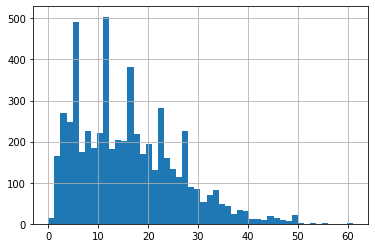

In [ ]:
# interesting features - DBH (Tree Diameters)
df_workhistory.INSP_TreeDBH.hist(bins=50)

In [ ]:
df_workhistory.groupby('INSP_TreeCondition')['INSP_TreeDBH'].mean()
#only 33 are excellent, can be ignored. 

INSP_TreeCondition
Critical     17.350746
Dead         11.333333
Excellent    11.031250
Fair         16.410499
Good         16.657796
Poor         16.609795
Unknown      15.338983
Name: INSP_TreeDBH, dtype: float64

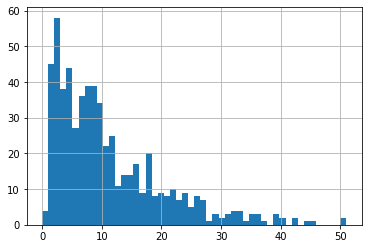

In [ ]:
df_workhistory[df_workhistory['INSP_TreeCondition'] == 'Dead'].INSP_TreeDBH.hist(bins=50)

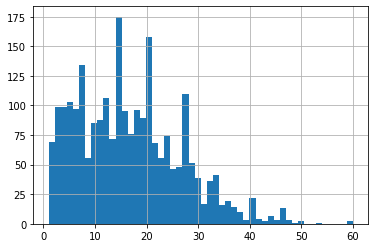

In [ ]:
df_workhistory[df_workhistory['INSP_TreeCondition'] == 'Good'].INSP_TreeDBH.hist(bins=50)

In [ ]:
df_workhistory['RiskRating_Grouped'] = df_workhistory.INSP_RiskRating.apply(lambda x: group_ratings(str(x)))
df_workhistory.groupby('RiskRating_Grouped')['INSP_TreeDBH'].mean()
# High Risk Rating Group has highest average DBH...

RiskRating_Grouped
Extreme     21.230769
High        23.171975
Low         16.611334
Moderate    21.403030
Unknown     14.694843
Name: INSP_TreeDBH, dtype: float64

In [ ]:
df_workhistory.INSP_Type.value_counts()

Level 1                     2929
Level 2                     2536
Sidewalk Rating              245
General - Planting Space      75
Level 3                       11
Name: INSP_Type, dtype: int64